# Predicting GDP of Japan based on various sectors

In [18]:
import wbdata
import pandas as pd
import pycountry
import wbdata
import datetime
import matplotlib.pyplot as plt

 
#Selecting country from world bank data
countries = ["JPN"]

#Gathering data of various sector for the country
indicators1 = { 
               'BX.KLT.DINV.WD.GD.ZS': 'FDI net inflows', 
               'BM.KLT.DINV.WD.GD.ZS':'FDI net outflows', 
              'SH.XPD.GHED.GD.ZS': 'Domestic health expenditure',
              'GC.XPN.TOTL.GD.ZS': 'Expense on Goods & Services',
              'NE.CON.TOTL.ZS': 'Final consumption expenditure',
                'NV.AGR.TOTL.ZS' : 'Agriculture,forestry,fishing',
           'GB.XPD.RSDV.GD.ZS' : 'Research and development expenditure'
              }

#Indicating the time frame(years)
data_date = (datetime.datetime(1970, 1, 1), datetime.datetime(2015, 1, 1))
 
#Getting a dataframe with all the data 
df1 = wbdata.get_dataframe(indicators1, country=countries, data_date=data_date ,convert_date=False)


***Foreign direct investment are the net inflows of investment to acquire a lasting management interest (10 percent or more of voting stock) in an enterprise operating in an economy other than that of the investor.***

***Foreign direct investment refers to direct investment equity flows in an economy. It is the sum of equity capital, reinvestment of earnings, and other capita.***

***Domestic general government health expenditure (% of GDP) refers to public expenditure on health from domestic sources as a share of the economy as measured by GDP
World Health Organization Global Health Expenditure database (http://apps.who.int/nha/database).***

***Expense is cash payments for operating activities of the government in providing goods and services. It includes compensation of employees (such as wages and salaries), interest and subsidies, grants, social benefits, and other expenses such as rent and dividends.***

***Final consumption expenditure (formerly total consumption) is the sum of household final consumption expenditure (private consumption) and general government final consumption expenditure (general government consumption).***

***Agriculture corresponds to ISIC divisions 1-5 and includes forestry, hunting, and fishing, as well as cultivation of crops and livestock production. Value added is the net output of a sector after adding up all outputs and subtracting intermediate inputs***

***Gross domestic expenditures on research and development (R&D), expressed as a percent of GDP. They include both capital and current expenditures in the four main sectors: Business enterprise, Government, Higher education and Private non-profit. R&D covers basic research, applied research, and experimental development.***

In [19]:
#Inserting the country code
df1.insert(0, "Country code","JPN")
df1

,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Research and development expenditure
date,,,,,,,,
2015,JPN,0.119655,3.153338,9.152859,17.167702,76.396419,1.113905,3.28165
2014,JPN,0.407228,2.843560,9.111688,17.772478,78.549066,1.056266,3.40022
2013,JPN,0.206537,3.019650,9.093095,18.342443,79.125816,1.104187,3.31496
2012,JPN,0.008817,1.896313,9.056669,18.338171,78.892195,1.141796,3.20908
2011,JPN,-0.013816,1.897458,8.890506,18.821103,78.439710,1.075419,3.24477
2010,JPN,0.130541,1.397459,7.501892,17.399465,77.242008,1.102260,3.13708
2009,JPN,0.233714,1.408368,7.363869,18.404968,78.125377,1.082613,3.23140
2008,JPN,0.488791,2.255770,6.655597,15.466194,75.003116,1.058409,3.33718
2007,JPN,0.479068,1.616510,6.410943,14.174191,73.623827,1.060904,3.33960


In [20]:
df1.reset_index(inplace = True)

#### Performing Exploratory Data Analysis on the data to elimate the NaN values

In [21]:
df1['Research and development expenditure']= df1['Research and development expenditure'].interpolate(method = 'polynomial', order = 2)
df1['Research and development expenditure'] = df1['Research and development expenditure'].interpolate(method = 'pad')
df1['Domestic health expenditure'] = df1['Domestic health expenditure'].interpolate(method = 'pad')
df1['Agriculture,forestry,fishing'] = df1['Agriculture,forestry,fishing'].interpolate(method = 'pad')
df1['Expense on Goods & Services'] = df1['Expense on Goods & Services'].interpolate(method = 'polynomial', order =2)
df1['Expense on Goods & Services'] = df1['Expense on Goods & Services'].interpolate(method = 'pad')
df1

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Research and development expenditure
0,2015,JPN,0.119655,3.153338,9.152859,17.167702,76.396419,1.113905,3.28165
1,2014,JPN,0.407228,2.843560,9.111688,17.772478,78.549066,1.056266,3.40022
2,2013,JPN,0.206537,3.019650,9.093095,18.342443,79.125816,1.104187,3.31496
3,2012,JPN,0.008817,1.896313,9.056669,18.338171,78.892195,1.141796,3.20908
4,2011,JPN,-0.013816,1.897458,8.890506,18.821103,78.439710,1.075419,3.24477
5,2010,JPN,0.130541,1.397459,7.501892,17.399465,77.242008,1.102260,3.13708
6,2009,JPN,0.233714,1.408368,7.363869,18.404968,78.125377,1.082613,3.23140
7,2008,JPN,0.488791,2.255770,6.655597,15.466194,75.003116,1.058409,3.33718
8,2007,JPN,0.479068,1.616510,6.410943,14.174191,73.623827,1.060904,3.33960
9,2006,JPN,-0.052908,1.283612,6.271379,15.077559,73.837348,1.094292,3.27844


### Collect GDP after two years data from world bank and merge it with the above dataframe

In [22]:
#grab indicators above for countires above and load into data frame
data_date = (datetime.datetime(1972, 1, 1), datetime.datetime(2017, 1, 1))
indicators2 = {'NY.GDP.PCAP.CD': 'GDP per Capita after 2 years'}
              

In [23]:
#grab indicators above for countires above and load into data frame
df2 = wbdata.get_dataframe(indicators2, country=countries, data_date=data_date ,convert_date=False)

In [24]:
df2

,GDP per Capita after 2 years
date,
2017,38331.979398
2016,38794.330941
2015,34524.469861
2014,38109.412113
2013,40454.447458
2012,48603.476650
2011,48167.997268
2010,44507.676386
2009,40855.175635


In [25]:
df2.reset_index(inplace = True)

In [26]:
df2 = df2.drop(['date'],axis = 1)

In [27]:
df2

,GDP per Capita after 2 years
0,38331.979398
1,38794.330941
2,34524.469861
3,38109.412113
4,40454.447458
5,48603.476650
6,48167.997268
7,44507.676386
8,40855.175635
9,39339.297573


In [28]:
df_joined = pd.merge(df1,df2,left_index=True, right_index=True)
df_joined

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Research and development expenditure,GDP per Capita after 2 years
0,2015,JPN,0.119655,3.153338,9.152859,17.167702,76.396419,1.113905,3.28165,38331.979398
1,2014,JPN,0.407228,2.843560,9.111688,17.772478,78.549066,1.056266,3.40022,38794.330941
2,2013,JPN,0.206537,3.019650,9.093095,18.342443,79.125816,1.104187,3.31496,34524.469861
3,2012,JPN,0.008817,1.896313,9.056669,18.338171,78.892195,1.141796,3.20908,38109.412113
4,2011,JPN,-0.013816,1.897458,8.890506,18.821103,78.439710,1.075419,3.24477,40454.447458
5,2010,JPN,0.130541,1.397459,7.501892,17.399465,77.242008,1.102260,3.13708,48603.476650
6,2009,JPN,0.233714,1.408368,7.363869,18.404968,78.125377,1.082613,3.23140,48167.997268
7,2008,JPN,0.488791,2.255770,6.655597,15.466194,75.003116,1.058409,3.33718,44507.676386
8,2007,JPN,0.479068,1.616510,6.410943,14.174191,73.623827,1.060904,3.33960,40855.175635
9,2006,JPN,-0.052908,1.283612,6.271379,15.077559,73.837348,1.094292,3.27844,39339.297573


### Normalizing the data in the column to bring all the columns to a common scale

We have used MinMaxScaler from sklearn for normalization

In [29]:

from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure','GDP per Capita after 2 years']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure','GDP per Capita after 2 years']] = pd.DataFrame(x_scaled)

### Finding the correlation between the data

In [30]:
df_joined.corr()

,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Research and development expenditure,GDP per Capita after 2 years
FDI net inflows,1.000000,0.589961,0.312063,0.228952,0.511133,-0.605293,0.650002,0.434150
FDI net outflows,0.589961,1.000000,0.895039,0.506274,0.835731,-0.893444,0.932900,0.584127
Domestic health expenditure,0.312063,0.895039,1.000000,0.512781,0.751542,-0.733424,0.784552,0.448006
Expense on Goods & Services,0.228952,0.506274,0.512781,1.000000,0.776719,-0.514000,0.495790,0.557005
Final consumption expenditure,0.511133,0.835731,0.751542,0.776719,1.000000,-0.900876,0.875533,0.753178
"Agriculture,forestry,fishing",-0.605293,-0.893444,-0.733424,-0.514000,-0.900876,1.000000,-0.971940,-0.711289
Research and development expenditure,0.650002,0.932900,0.784552,0.495790,0.875533,-0.971940,1.000000,0.652664
GDP per Capita after 2 years,0.434150,0.584127,0.448006,0.557005,0.753178,-0.711289,0.652664,1.000000


### Heat map of the correlation

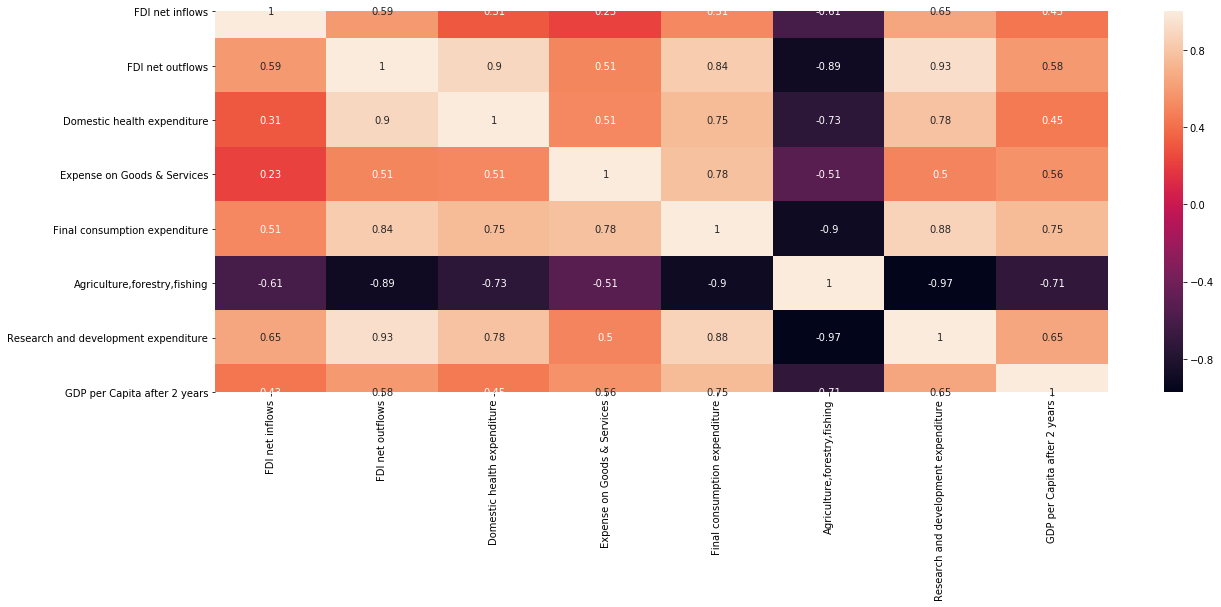

In [31]:
import seaborn as sns
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df_joined.corr(), annot=True)

In [32]:
df_joined

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Research and development expenditure,GDP per Capita after 2 years
0,2015,JPN,0.318558,1.000000,1.000000,0.656149,0.872031,0.065086,0.832566,0.774928
1,2014,JPN,0.849431,0.902831,0.987896,0.720586,0.972959,0.000000,1.000000,0.785059
2,2013,JPN,0.478946,0.958065,0.982429,0.781313,1.000000,0.054112,0.879603,0.691496
3,2012,JPN,0.113947,0.605704,0.971720,0.780858,0.989047,0.096580,0.730089,0.770051
4,2011,JPN,0.072165,0.606063,0.922868,0.832312,0.967832,0.021627,0.780487,0.821436
5,2010,JPN,0.338655,0.449227,0.514613,0.680843,0.911677,0.051936,0.628417,1.000000
6,2009,JPN,0.529116,0.452649,0.474034,0.787975,0.953094,0.029750,0.761608,0.990458
7,2008,JPN,1.000000,0.718457,0.265801,0.474861,0.806706,0.002419,0.910981,0.910252
8,2007,JPN,0.982052,0.517937,0.193872,0.337204,0.742037,0.005236,0.914398,0.830217
9,2006,JPN,0.000000,0.413516,0.152840,0.433454,0.752048,0.042938,0.828033,0.797000


### Using OLS for finding the p value and t statistics 

In [33]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
model = sm.OLS(df_joined['GDP per Capita after 2 years'], df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services', 'Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure']]).fit()

# Print out the statistic
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     GDP per Capita after 2 years   R-squared (uncentered):                   0.900
Model:                                      OLS   Adj. R-squared (uncentered):              0.882
Method:                           Least Squares   F-statistic:                              49.96
Date:                          Tue, 21 Apr 2020   Prob (F-statistic):                    1.64e-17
Time:                                  21:21:15   Log-Likelihood:                          10.451
No. Observations:                            46   AIC:                                     -6.902
Df Residuals:                                39   BIC:                                      5.899
Df Model:                                     7                                                  
Covariance Type:                      nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
FDI net inflows                         -0.0197      0.212     -0.093      0.926      -0.448       0.408
FDI net outflows                         0.2244      0.497      0.451      0.654      -0.781       1.230
Domestic health expenditure             -0.3998      0.286     -1.397      0.170      -0.978       0.179
Expense on Goods & Services             -0.1371      0.277     -0.495      0.623      -0.697       0.423
Final consumption expenditure            1.2542      0.387      3.245      0.002       0.472       2.036
Agriculture,forestry,fishing            -0.0498      0.098     -0.510      0.613      -0.247       0.148
Research and development expenditure    -0.1175      0.396     -0.296      0.768      -0.919       0.684
==============================================================================
Omnibus:                        1.956   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.725
Skew:                           0.464   Prob(JB):                        0.422
Kurtosis:                       2.801   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### For any modelling task, the hypothesis is that there is some correlation between the features and the target.

#### The null hypothesis : there is no correlation between the features and the target.

Considering the significance value of 0.05.

1. The **FDI net inflows** has the p-value 0.000, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
2.  The **FDI net outflows** has the p-value 0.963, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
2. The **Domestic health expenditure** has the p-value 	0.000, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
3. The **Expense on Goods & Services** has the p-value 0.807, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
4. The **Final consumption expenditure** has the p-value 0.000, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
5. The **Agriculture,forestry,fishing** has the p-value 0.877,which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
6. The **Research and development expenditure** has the p-value 0.020, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.

## Modelling the data using Linear regression

### Train, test and validation split

Data is split into 3 parts 

Taining data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [136]:
from sklearn.model_selection import  train_test_split

X = df_joined[['FDI net inflows','Domestic health expenditure','Final consumption expenditure','Research and development expenditure']]

y = df_joined['GDP per Capita after 2 years']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

### Linear Regression

In [137]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [138]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)

In [139]:
#training Data

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))

Coefficients: 
 [ 0.51031412  0.43766017  0.55432206 -0.25312685]
Mean squared error: 0.01
Coefficient of determination: 0.93


In [140]:
# Make predictions using the testing set
y_pred = regr.predict(X_val)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))

Coefficients: 
 [ 0.51031412  0.43766017  0.55432206 -0.25312685]
Mean squared error: 0.01
Coefficient of determination: 0.89


In [141]:
y_pred

array([0.34955809, 0.41160527, 0.19087776, 0.62915474, 0.12674533,
       0.86551688, 0.19810845])

In [144]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
#regr.score(X_test, y_test)
train_score=regr.score(X_train, y_train)
test_score=regr.score(X_test, y_test)


print("linear regression train score:", train_score)
print("linear regression test score:", test_score)

linear regression train score: 0.9263303452685306
linear regression test score: 0.9766305196334015


Text(0, 0.5, 'Predictions')

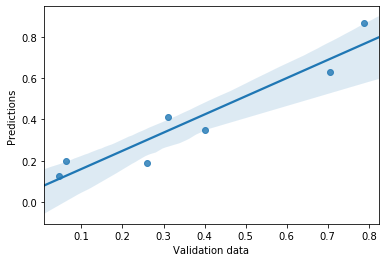

In [29]:
## The line / model
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(y_val,y_pred)
plt.xlabel('Validation data')
plt.ylabel('Predictions')

### Regularization 

##### Regularization helps to solve over fitting problem which implies model performing well on training data but performing poorly on validation (test) data. Regularization solves this problem by adding a penalty term to the objective function and control the model complexity using that penalty term.

#### Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.

#### Ridge regularization

In [196]:
from sklearn.linear_model import Ridge

regr = LinearRegression()
regr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print("ridge regression train score with alpha 0.01:", Ridge_train_score)
print("ridge regression test score with alpha 0.01:", Ridge_test_score)

linear regression train score: 0.9263303452685306
linear regression test score: 0.9766305196334015
ridge regression train score with alpha 0.01: 0.9264010233280078
ridge regression test score with alpha 0.01: 0.9711006425111857


Which hyperparameters are important? 
1. The training and validation set to split.
2. The features which affect the target variable is the hyperparameter.
3. Alpha in the regularization 

####  Regularization did not have any effect on the data as there is no overfitting of the data

## Random forest

#### Train,test and validation split

Data is split into 3 parts 

Training data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [147]:
from sklearn.model_selection import  train_test_split

X = df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure']]

y = df_joined['GDP per Capita after 2 years']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [148]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

random_model = RandomForestRegressor(n_estimators =100,
 min_samples_split = 10,
 min_samples_leaf = 15,
 max_features= 'auto',
 max_depth = 20,
 bootstrap = True)
random_model.fit(X_train, y_train)
print('Training score',r2_score(y_train, random_model.predict(X_train)))

Training score -0.0004611190126588838


In [149]:
print('R2 score for training data' ,r2_score(y_train, random_model.predict(X_train)))
print('R2 score for test data',r2_score(y_test, random_model.predict(X_test)))

      
print('Root mean square error score on training set',np.sqrt(mean_squared_error(y_train,random_model.predict(X_train))))
print('Root mean square error score on test set',np.sqrt(mean_squared_error(y_test,random_model.predict(X_test))))


R2 score for training data -0.0004611190126588838
R2 score for test data -0.03880641574350552
Root mean square error score on training set 0.2940976939879803
Root mean square error score on test set 0.4072106979895009


### The training and test score is quite bad without tuning the hyperparameters

### So we use Grid search for the tunning the hyper parameter


Which hyperparameters are important? 
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

Used the Grid Search to tune the **Hyper Parameter** and found the best possible hyperparameter for the Random Hyperparameter Grid.

After hyperparameter tunning, the model did better performance.

In [81]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [82]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   31.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [83]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [84]:
from sklearn.ensemble import RandomForestRegressor


random_model = RandomForestRegressor(n_estimators =200,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features= 'sqrt',
 max_depth = 50,
 bootstrap = True)
random_model.fit(X_train, y_train)
print('Training score is',r2_score(y_train, random_model.predict(X_train)))

Training score is 0.9943792616508402


In [85]:
print('Testing score is ',r2_score(y_test, random_model.predict(X_test)))

rmse = np.sqrt(mean_squared_error(y_test,random_model.predict(X_test)))
print('Root mean square error is',rmse)

Testing score is  0.924777229796469
Root mean square error is 0.1095787971588296


### Artifical Neural Network

##### Artificial Neural Networks (ANN) are multi-layer fully-connected neural nets.


#### Train test split

In [175]:
#Train test split
train_dataset = df_joined.sample(frac=0.8,random_state=0)
test_dataset = df_joined.drop(train_dataset.index)

#### Performing Exploratory Data Analysis

In [176]:
train_dataset = train_dataset.drop('Country code',axis =1)
train_dataset = train_dataset.drop('date',axis =1)
test_dataset = test_dataset.drop('Country code',axis =1)
test_dataset = test_dataset.drop('date',axis =1)

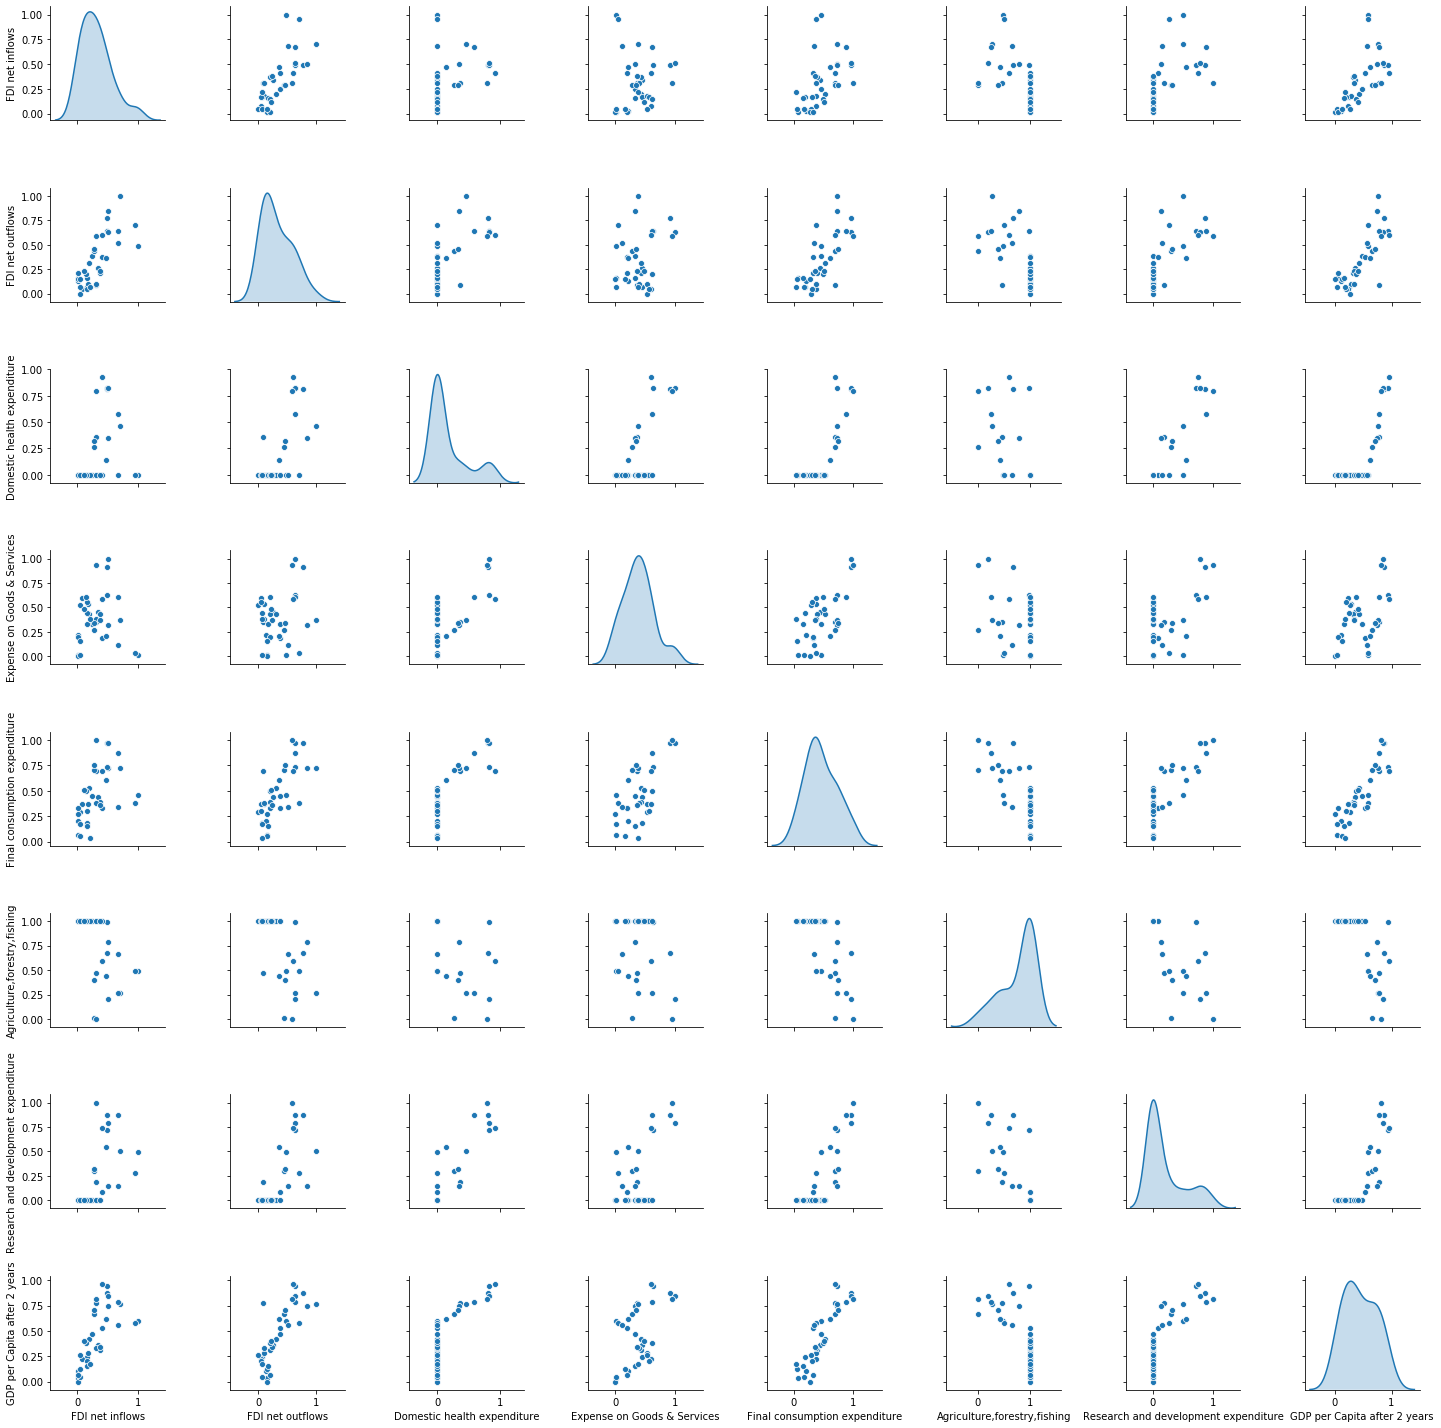

In [154]:
#Ploting pairwise relationships in the dataset 
sns.pairplot(train_dataset, diag_kind="kde")

In [177]:
#computing a summary of statistics 
train_stats = train_dataset.describe()

#Droping the target column
train_stats.pop("GDP per Capita after 2 years")

#Transpose of the dataset
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
FDI net inflows,37.0,0.318475,0.250890,0.014244,0.148222,0.286271,0.468378,1.000000
FDI net outflows,37.0,0.335410,0.260352,0.000000,0.129092,0.231292,0.520727,1.000000
Domestic health expenditure,37.0,0.179996,0.302756,0.000000,0.000000,0.000000,0.324702,0.924457
Expense on Goods & Services,37.0,0.387255,0.251203,0.000000,0.205426,0.370988,0.530108,1.000000
Final consumption expenditure,37.0,0.467997,0.262065,0.039878,0.302463,0.393218,0.696756,1.000000
"Agriculture,forestry,fishing",37.0,0.776954,0.323292,0.000000,0.495766,1.000000,1.000000,1.000000
Research and development expenditure,37.0,0.215761,0.317387,0.000000,0.000000,0.000000,0.315807,1.000000


In [178]:
#Droping the target lable in the train and test dataset
train_labels = train_dataset.pop('GDP per Capita after 2 years')
test_labels = test_dataset.pop('GDP per Capita after 2 years')

In [179]:
#Function for normalising the dataset
def norm(a):
    return (a - train_stats['mean']) / train_stats['std']

In [180]:
#Normalization of train and test dataset
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [181]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [182]:
#Building the model with one input, hidden and output layer.

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    #using optimizer perform backpropagation and 0.001 is the learning rate
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) #update weights
    return model

In [183]:
model = build_model()

In [184]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [185]:
example_batch = normed_train_data[:9]
example_result = model.predict(example_batch)
example_result

array([[ 0.06358364],
       [ 0.12101533],
       [ 0.04467841],
       [ 0.03135204],
       [-0.0686149 ],
       [ 0.08458593],
       [ 0.11168151],
       [ 0.16204788],
       [ 0.03909199]], dtype=float32)

In [186]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [187]:
#Earlystopping to avoid overfitting
earlystopper = EarlyStopping(patience=3, verbose=1)

filepath = "model.h5"

#save the model in model.h5
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

 

callbacks_list = [earlystopper, checkpoint]

In [188]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=callbacks_list)

Train on 29 samples, validate on 8 samples
Epoch 1/1000

Epoch 00001: val_loss improved from inf to 0.10599, saving model to model.h5
29/29 [==============================] - 0s 4ms/sample - loss: 0.2334 - mae: 0.3924 - mse: 0.2334 - val_loss: 0.1060 - val_mae: 0.2585 - val_mse: 0.1060
Epoch 2/1000

Epoch 00002: val_loss improved from 0.10599 to 0.05321, saving model to model.h5
29/29 [==============================] - 0s 653us/sample - loss: 0.0843 - mae: 0.2291 - mse: 0.0843 - val_loss: 0.0532 - val_mae: 0.1817 - val_mse: 0.0532
Epoch 3/1000

Epoch 00003: val_loss improved from 0.05321 to 0.03549, saving model to model.h5
29/29 [==============================] - 0s 620us/sample - loss: 0.0441 - mae: 0.1580 - mse: 0.0441 - val_loss: 0.0355 - val_mae: 0.1418 - val_mse: 0.0355
Epoch 4/1000

Epoch 00004: val_loss improved from 0.03549 to 0.02944, saving model to model.h5
29/29 [==============================] - 0s 619us/sample - loss: 0.0324 - mae: 0.1374 - mse: 0.0324 - val_loss: 0.0294

In [189]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
23,0.003072,0.042997,0.003072,0.013233,0.096788,0.013233,23
24,0.002979,0.043938,0.002979,0.011587,0.081181,0.011587,24
25,0.003065,0.043004,0.003065,0.013685,0.099423,0.013685,25
26,0.003153,0.048618,0.003153,0.012908,0.082480,0.012908,26
27,0.003697,0.049380,0.003697,0.014582,0.097944,0.014582,27


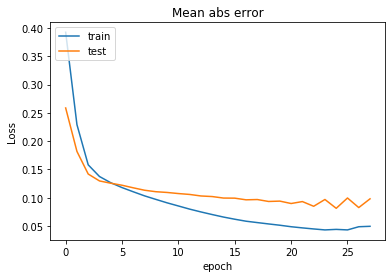

In [190]:
# summarize history of mean absolute error
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean abs error')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


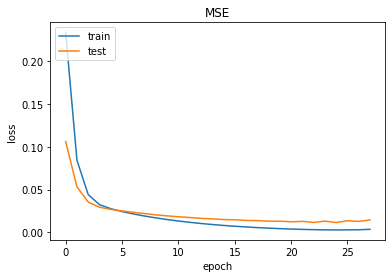

In [191]:
# summarize history for mean square error
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [192]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop])

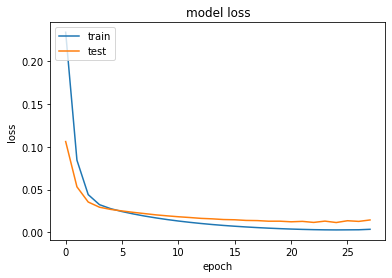

In [193]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [194]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

9/9 - 0s - loss: 0.0103 - mae: 0.0840 - mse: 0.0103
Testing set Mean Abs Error:  0.08


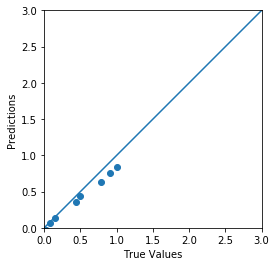

In [195]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)
_ = plt.plot([-100, 100], [-100, 100])

In [197]:
test_predictions

array([ 0.83620113,  0.7540253 ,  0.6279605 ,  0.43572676,  0.35433942,
        0.13183959,  0.06807486, -0.0292077 , -0.03724059], dtype=float32)

## Conclusion

After our analysis, we have come to a conclusion that ***FDI net inflows, Domestic health expenditure, Final consumption expenditure and Research and development expenditure*** are important factors impacting GDP per capita for ***USA***